In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carga del dataset

In [43]:
df = pd.read_csv(r'C:\Users\iauzm\OneDrive\Desktop\DATA SCIENCE\AUZMENDI\proyecto_2_NBA\NBA_EDA\src\data\game.csv')

### Primer análisis del dataset

In [44]:
print(df.shape)
df.head()

(65698, 55)


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               65698 non-null  int64  
 1   team_id_home            65698 non-null  int64  
 2   team_abbreviation_home  65698 non-null  object 
 3   team_name_home          65698 non-null  object 
 4   game_id                 65698 non-null  int64  
 5   game_date               65698 non-null  object 
 6   matchup_home            65698 non-null  object 
 7   wl_home                 65696 non-null  object 
 8   min                     65698 non-null  int64  
 9   fgm_home                65685 non-null  float64
 10  fga_home                50251 non-null  float64
 11  fg_pct_home             50208 non-null  float64
 12  fg3m_home               52480 non-null  float64
 13  fg3a_home               47015 non-null  float64
 14  fg3_pct_home            46624 non-null

Hay varios nulos, hay que ver de donde vienen.

In [46]:
df.describe()

,season_id,team_id_home,game_id,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,65698.000000,6.569800e+04,6.569800e+04,65698.000000,65685.000000,50251.000000,50208.000000,52480.000000,47015.000000,46624.000000,...,46700.000000,49973.000000,49897.000000,46849.000000,47073.000000,47013.000000,62847.000000,65698.000000,65698.000000,65698.000000
mean,22949.338747,1.609926e+09,2.584747e+07,221.003486,39.672269,83.992796,0.467321,5.735099,17.741146,0.346136,...,30.238073,42.119645,22.135419,7.854148,4.681537,15.199860,23.097284,100.991567,-3.627569,0.201330
std,5000.305500,3.324313e+07,6.303760e+06,67.903521,6.770802,9.164445,0.059423,4.537337,10.545810,0.151234,...,5.588675,6.867396,5.380805,3.031766,2.500820,4.299798,5.227208,14.418755,13.091395,0.400997
min,12005.000000,4.500000e+01,1.050000e+07,0.000000,4.000000,0.000000,0.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-73.000000,0.000000
25%,21981.000000,1.610613e+09,2.130053e+07,240.000000,35.000000,78.000000,0.427000,2.000000,10.000000,0.261000,...,26.000000,37.000000,18.000000,6.000000,3.000000,12.000000,20.000000,92.000000,-12.000000,0.000000
50%,21997.000000,1.610613e+09,2.630007e+07,240.000000,40.000000,84.000000,0.467000,5.000000,16.000000,0.348000,...,30.000000,42.000000,22.000000,8.000000,4.000000,15.000000,23.000000,101.000000,-4.000000,0.000000
75%,22011.000000,1.610613e+09,2.880069e+07,240.000000,44.000000,89.000000,0.506000,9.000000,24.000000,0.429750,...,34.000000,47.000000,26.000000,10.000000,6.000000,18.000000,26.000000,110.000000,5.000000,0.000000
max,42022.000000,1.610617e+09,4.980009e+07,365.000000,84.000000,240.000000,0.697000,28.000000,77.000000,1.000000,...,60.000000,90.000000,89.000000,27.000000,19.000000,40.000000,115.000000,196.000000,68.000000,1.000000


#### manejo missings

Antes de poner a estudiar a fondo el dataset, para comprobar mi hipótesis necesito evaluar únicamente las temporadas en que existía el tiro de 3 puntos, que se instauro en 1979. 
Por tanto voy a convertir la columna game_date en tipo datetime y ordenar y filtrar por partidos posteriores a 1980.

In [56]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_date'].dtype

dtype('<M8[ns]')

In [48]:
df =df[df['game_date'].dt.year>=1985]

vuelvo a comprobar si hay missings en las columnas que me interesan

In [49]:
df[['season_id',  'team_name_home',
      'game_date',  'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 
       'pts_home', 
       'team_name_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away',  'pts_away',
       'season_type']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 47164 entries, 18534 to 65697
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season_id       47164 non-null  int64         
 1   team_name_home  47164 non-null  object        
 2   game_date       47164 non-null  datetime64[ns]
 3   fgm_home        47164 non-null  float64       
 4   fga_home        47164 non-null  float64       
 5   fg_pct_home     47164 non-null  float64       
 6   fg3m_home       47164 non-null  float64       
 7   fg3a_home       46630 non-null  float64       
 8   fg3_pct_home    46335 non-null  float64       
 9   ftm_home        47164 non-null  float64       
 10  fta_home        47164 non-null  float64       
 11  ft_pct_home     47162 non-null  float64       
 12  pts_home        47164 non-null  float64       
 13  team_name_away  47164 non-null  object        
 14  fgm_away        47164 non-null  float64       
 15  fga

In [50]:
df= df.dropna()


### 1ª hipótesis

"Se tira de 3 puntos más ahora que antes?

Lo primero que voy a hacer es fusionar las columnas de locales y visitantes porque no me aporta información. Lo haré haciendo la media de ambas columnas

In [51]:
df['season_id'] =df['season_id'].astype(str)
df['season']=df['season_id'].apply(lambda x: x[1:])

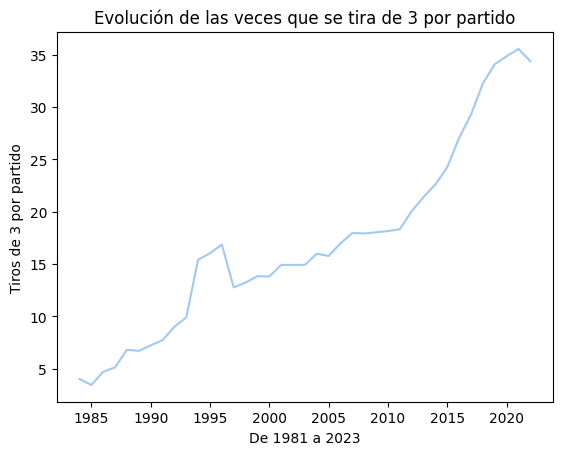

In [82]:
#TIROS DE 3 POR PARTIDO A LO LARGO DE LOS AÑOS
tiros_3_temporada= df[['season','game_date','fg3a_home']].groupby('season').mean('fg3a_home')
sns.lineplot(x="season", y="fg3a_home", data=tiros_3_temporada)
plt.title('Evolución de las veces que se tira de 3 por partido')
plt.xlabel("De 1981 a 2023")
plt.ylabel("Tiros de 3 por partido")
sns.set_palette("pastel")
plt.show()


### 2ª hipótesis

"Hay un porcentaje de acierto en tiros de 3 puntos mayor que antes?"

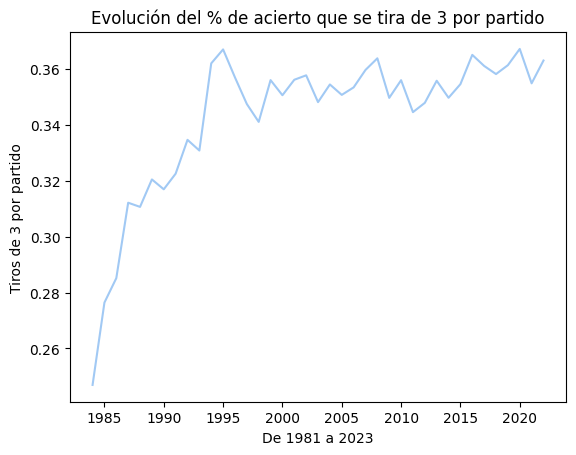

In [81]:
#TIROS DEL ACIERTO EN TIROS DE 3 A LO LARGO DE LOS AÑOS
tiros_3_pct_temporada= df[['season','game_date','fg3_pct_home']].groupby('season').mean('fg3_pct_home')
sns.lineplot(x="season", y="fg3_pct_home", data=tiros_3_pct_temporada)
plt.title('Evolución del % de acierto que se tira de 3 por partido')
plt.xlabel("De 1981 a 2023")
plt.ylabel("Tiros de 3 por partido")
sns.set_palette("pastel")
plt.show()

### 3ª hipótesis

"La contribución al marcador realtiva a los tiros de 3 pts es mayor ahora que antes?"

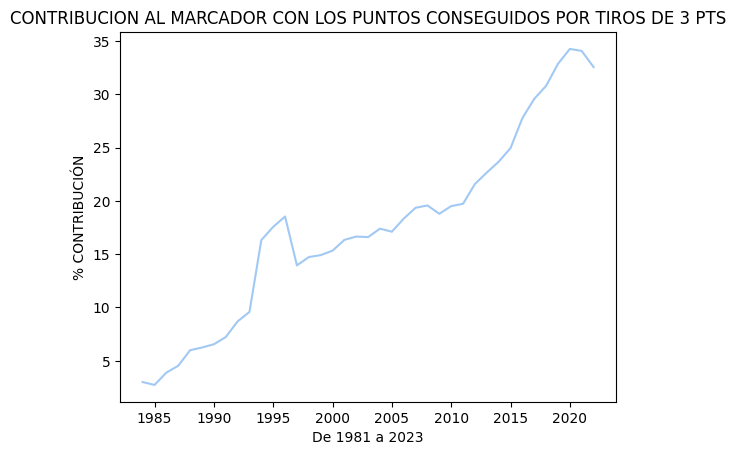

In [80]:
#CONTRIBUCION AL MARCADOR CON LOS PUNTOS CONSEGUIDOS POR TIROS DE 3 PTS
hip_3 =df[['season','pts_home','fg3m_home']].groupby('season').mean(['pts_home','fg3m_home'])
hip_3['pts_3']=3*hip_3['fg3m_home']
hip_3['contribución_triples']=(hip_3['pts_3'] / hip_3['pts_home'])*100
hip_3.drop(columns=['pts_home','fg3m_home','pts_3'],inplace=True)
sns.lineplot(x="season", y="contribución_triples", data=hip_3)
plt.title('CONTRIBUCION AL MARCADOR CON LOS PUNTOS CONSEGUIDOS POR TIROS DE 3 PTS')
plt.xlabel("De 1981 a 2023")
plt.ylabel("% CONTRIBUCIÓN")
sns.set_palette("pastel")
plt.show()

### 4ª y 5ª hipótesis

"¿Los mejores equipos tiran más?¿Y los peores?"
"¿Los mejores equipos aciertan más?¿Y los peores?" 

Vamos a centrarnos en una temporada para profundizar en los datos sobre los equipos.

In [85]:
df['season_type'].value_counts()

season_type
Regular Season    41854
Playoffs           2654
Pre Season         1533
All Star             34
All-Star             31
Name: count, dtype: int64

Lo primero será identificar cuáles son los mejores equipos.

Para ello voy a comparar cuales han ganado mas partidos y me quedaré con el top 5

In [87]:
df_22 = df[(df['season']==2022) & ((df['season_type']=='Regular Season') | (df['season_type']=='Playoffs'))]
df_22.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type,season
64312,22022,1610612738,BOS,Boston Celtics,22200001,2022-10-18,BOS vs. PHI,W,240,46.0,...,16.0,8.0,3.0,14.0,25.0,117.0,-9,1,Regular Season,2022
64313,22022,1610612744,GSW,Golden State Warriors,22200002,2022-10-18,GSW vs. LAL,W,240,45.0,...,23.0,12.0,4.0,22.0,18.0,109.0,-14,1,Regular Season,2022
64314,22022,1610612765,DET,Detroit Pistons,22200003,2022-10-19,DET vs. ORL,W,240,40.0,...,21.0,5.0,5.0,18.0,24.0,109.0,-4,1,Regular Season,2022
64315,22022,1610612762,UTA,Utah Jazz,22200012,2022-10-19,UTA vs. DEN,W,240,42.0,...,21.0,10.0,3.0,21.0,23.0,102.0,-21,1,Regular Season,2022
64316,22022,1610612751,BKN,Brooklyn Nets,22200006,2022-10-19,BKN vs. NOP,L,240,40.0,...,31.0,9.0,4.0,13.0,21.0,130.0,22,1,Regular Season,2022


In [95]:
df_22['wl_home']=df_22['wl_home'].map({'W':1,'L':0})
df_22['wl_away']=df_22['wl_away'].map({'W':1,'L':0})

# df_22[['team_name_home','wl_home']].pivot_table(index='team_name_home',columns='wl_home',agg_function=sum)

C:\Users\iauzm\AppData\Local\Temp\ipykernel_9492\1354401362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['wl_home']=df_22['wl_home'].map({'W':1,'L':0})
C:\Users\iauzm\AppData\Local\Temp\ipykernel_9492\1354401362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['wl_away']=df_22['wl_away'].map({'W':1,'L':0})


In [106]:
tabla_dinamica_1 = df_22.pivot_table(
    index="team_name_home",
    values=["wl_home", "fg3a_home", "fg3_pct_home"],
    aggfunc={"wl_home": "sum", "fg3a_home": "mean", "fg3_pct_home": "mean"},
    
)
tabla_dinamica_1.sort_values(by='wl_home',ascending=False)

,fg3_pct_home,fg3a_home,wl_home
team_name_home,,,
Denver Nuggets,0.384538,31.500000,44
Memphis Grizzlies,0.351455,34.977273,37
Golden State Warriors,0.390000,43.340426,37
Boston Celtics,0.374212,41.461538,37
Miami Heat,0.362255,33.000000,33
Milwaukee Bucks,0.375705,40.000000,33
Phoenix Suns,0.380213,31.680851,32
Cleveland Cavaliers,0.366455,32.386364,32
Philadelphia 76ers,0.384522,33.565217,32


In [107]:
tabla_dinamica_2 = df_22.pivot_table(
    index="team_name_away",
    values=["wl_away", "fg3a_away", "fg3_pct_away"],
    aggfunc={"wl_away": "sum", "fg3a_away": "mean", "fg3_pct_away": "mean"},
)
tabla_dinamica_2.sort_values(by='wl_away',ascending=False)

,fg3_pct_away,fg3a_away,wl_away
team_name_away,,,
Boston Celtics,0.371840,42.180000,31
Philadelphia 76ers,0.378532,32.000000,29
Sacramento Kings,0.355045,38.522727,26
New York Knicks,0.340894,36.319149,26
Milwaukee Bucks,0.361070,40.744186,26
Denver Nuggets,0.365060,30.420000,25
Miami Heat,0.344222,35.981481,24
Los Angeles Lakers,0.337327,30.571429,22
Brooklyn Nets,0.375209,33.465116,22


In [115]:
tabla_dinamica_2.reset_index(inplace=True)

In [116]:
hip_4=pd.merge(left_on='team_name_away',right_on='team_name_home',left=tabla_dinamica_2,right=tabla_dinamica_1)


In [119]:
hip_4['wl']=hip_4['wl_home'] +hip_4['wl_away']
hip_4['fg3_pct']=(hip_4['fg3_pct_home'] +hip_4['fg3_pct_away'])/2
hip_4['fg3a']=(hip_4['fg3a_home'] +hip_4['fg3a_away'])/2
hip_4.drop(columns=['fg3_pct_away','fg3a_away','wl_away','fg3_pct_home','fg3a_home','wl_home'],inplace=True)
hip_4 =hip_4.rename(columns={'team_name_away':'team'})
hip_4

KeyError: 'wl_home'

In [122]:
hip_4 =hip_4.sort_values(by='wl',ascending=False)

In [137]:
def categoria_equipos(wl):
    if wl>56:
        return 'muy bueno'
    elif (wl>43) and (wl<=56):
        return 'bueno'
    elif (wl>30) and (wl<=43):
        return 'malo'
    elif (wl>17) and (wl<=30):
        return 'muy malo'
hip_4['categoria']=hip_4['wl'].apply(categoria_equipos)

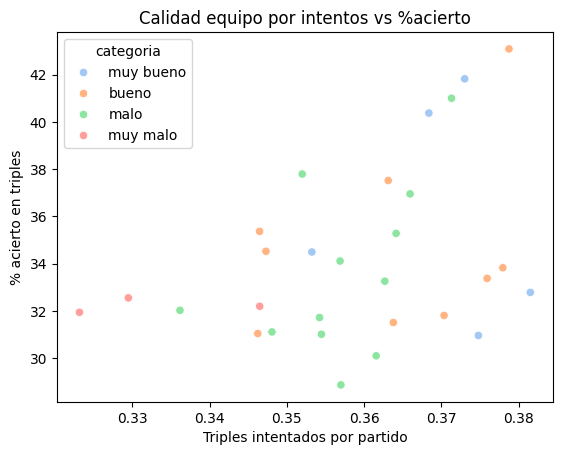

In [138]:
sns.scatterplot(hip_4,x='fg3_pct',y='fg3a',hue='categoria')
plt.title('Calidad equipo por intentos vs %acierto')
plt.xlabel('Triples intentados por partido')
plt.ylabel('% acierto en triples')
plt.show()

### CONCLUSIONES
Sorpresa.

En esta gráfica podemos ver varias cosas.
- Por un lado el porcentaje de acierto en el tiro parece no tener una gran correlación con el éxito del equipo. 
- Es cierto que dentro del grupo equipos "muy buenos" hay bastante dispersión con respecto al % de acierto, pero este se va reduciendo a medida que bajamos de categoría. 
- La cantidad de tiros está muy correlacionada con la calidad del equipo. 
  
En otras palabras:

" Para ser bueno hay que tirar mucho, que aciertes o falles no es importante."

Por lo tanto respondiendo a la hipótesis principal.

**HIPÓTESIS** Asumiendo que en la actualidad todos los equipos tiran más triples por partido, ¿es en realidad más “rentable” tirar mucho de lejos para ganar partidos? Yo creo que no, o como mucho hasta cierto punto.+

**RESPUESTA** Sí. Para ser bueno hay que tirar mucho, que aciertes o falles no es importante.

